# Colab1: Linear Regression on the Boston house dataset (DUE 6. November via Felix)
In this practical you will use a dataset that was taken from the StatLib library which is maintained at Carnegie Mellon University.The Boston house dataset has 506 samples and each sample contains 13 features. The goal is to learn a linear model to predict house prices.


Your code is completely in python.


In [3]:

import numpy as np
import matplotlib.pyplot as plt
!pip install scikit-learn==1.1.3
import sklearn

import seaborn as sns
import tensorflow as tf
sns.set_style("whitegrid")
sns.set_context("poster")


from sklearn.datasets import load_boston

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.8/30.8 MB 39.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


In [4]:
boston = load_boston()
print( boston.keys())
print(boston.data.shape)

print(boston.feature_names)
print(boston.DESCR)

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])
(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distan

/usr/local/lib/python3.9/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.


In [5]:
X_ = boston.data
print(X_)
y_ = boston.target
print(y_)
mu = np.mean(X_,axis=0)
print(mu)
sigma = np.std(X_,axis=0)
print(sigma)
X_ = (X_ - mu)/sigma #data normalization
print(y_.shape)
print(X_.shape)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.

In [6]:
print( X_[0:400].shape)
print( np.reshape(y_[0:400],[400,1]).shape)


(400, 13)
(400, 1)


# Split the data into training: first 400 rows, and validation: rest. (10 Pts)

In [7]:
#your code here:
X_train = X_[0:400]
y_train = np.reshape(y_[0:400],[400,1])
#add column of ones in the first column
col = np.ones(400);

X_train = np.c_[col,X_train]
print('data training shape: ', X_train.shape)
print('target training shape: ', y_train.shape)

X_validation = X_[401:]
#add column of ones in the first column
col = np.ones(105)
X_validation= np.c_[col,X_validation]
print('validation data shape: ', X_validation.shape)
y_validation = np.reshape(y_[401:],[105,1])

data training shape:  (400, 14)
target training shape:  (400, 1)
validation data shape:  (105, 14)


# Implement the *Normal Equations* in Python to have the optimal parameters for this model. (25 Pts)

\begin{align}\boldsymbol{\hat \theta} = (X^T X)^{-1}X^T \boldsymbol{y}\end{align}
then apply the found parameters to estimate the prices for the validation data set: \begin{align}\boldsymbol{\hat y}_{validation} = X_{validation} \boldsymbol{\hat\theta}\end{align}

In [37]:
#your code here (opt = theta_hat above):
opt = np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(X_train),X_train)),np.transpose(X_train)),y_train)
print(opt)
print(opt.shape)
#
y_hat_validation =   np.matmul(X_validation,opt) 
print(y_hat_validation.shape)


[[23.28337581]
 [-1.643388  ]
 [ 1.0305089 ]
 [ 0.37845963]
 [ 0.43550243]
 [-1.73595149]
 [ 3.43080791]
 [ 0.07337369]
 [-2.7237948 ]
 [ 4.21699484]
 [-2.59301797]
 [-1.74926608]
 [-0.1178641 ]
 [-3.69508319]]
(14, 1)
(105, 1)


Show a scatterplot of the actual price versus predicted price.

Text(0.5, 1.0, 'Prices vs Predicted prices')

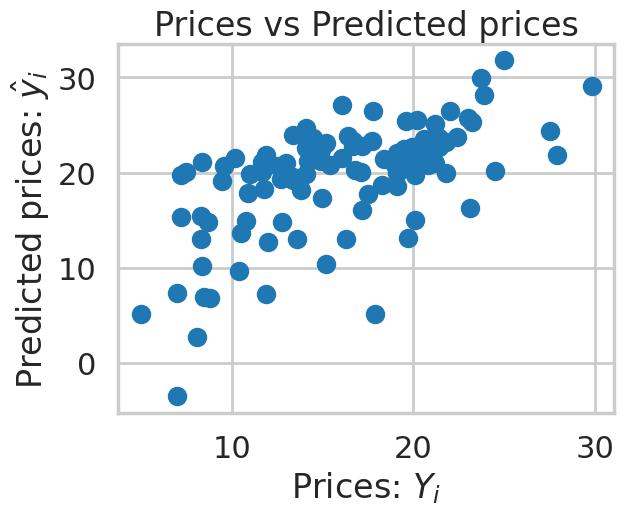

In [9]:
#==============================================================================
plt.scatter(y_validation, y_hat_validation)
plt.xlabel("Prices: $Y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
plt.title("Prices vs Predicted prices")
#==============================================================================


# Gradient Descent (60 Pts)

> Eingerückter Textblock


Define $\theta$ as the parameter to be updated. The size is 13+1=14. Implement the linear regression by computing the gradient and update the parameters iteratively. Use approximately 1000 iterations. You can set alpha to 0.0001 Set $\theta_0$ to random numbers. Check out `np.random.random_sample`. 

---


\begin{align}
\boldsymbol{\theta}_{k +1}= \boldsymbol{\theta}_{k} - \alpha\nabla{ J(\boldsymbol{\theta})}
\end{align}
where \begin{align}\nabla J(\boldsymbol{\theta})=X^T (\boldsymbol{\hat y_k} -\boldsymbol{y})\end{align} and \begin{align}\boldsymbol{\hat y_k} = X\cdot  \boldsymbol{\theta}_{k}\end{align}



In [10]:
print(np.random.random_sample())

0.2308005628325922


In [32]:
#your code here
alpha = 0.0001;
theta = np.random.random_sample()
for x in range(1000):
  y_hat_k = np.dot(X_train,theta)
  cost_func = np.matmul(np.transpose(X_train),(y_hat_k - y_train));
  theta = theta - alpha * cost_func


In [33]:
print(np.shape(theta), theta)

(14, 14) [[23.25121796 23.25121952 23.25121879 23.25121827 23.25121897 23.25122035
  23.25121856 23.2512188  23.25121919 23.2512162  23.25122036 23.25121909
  23.25122131 23.25121829]
 [-1.58664814 -1.58665046 -1.5866486  -1.58664763 -1.58664914 -1.58665004
  -1.58664854 -1.58664896 -1.58664901 -1.58664287 -1.58665329 -1.58664926
  -1.58665049 -1.58664801]
 [ 1.00258154  1.00258181  1.00258127  1.00258094  1.00258174  1.00258148
   1.00258179  1.00258146  1.00258149  1.00257846  1.00258485  1.00258163
   1.00258179  1.00258176]
 [ 0.28162441  0.28162616  0.28162432  0.28162224  0.2816255   0.28162622
   0.2816254   0.28162419  0.28162445  0.28161448  0.28163467  0.28162563
   0.28162649  0.28162524]
 [ 0.45715233  0.45715188  0.45715234  0.45715272  0.45715207  0.45715204
   0.45715214  0.45715228  0.45715229  0.45715455  0.45715     0.45715209
   0.45715182  0.4571522 ]
 [-1.69469424 -1.69469697 -1.69469587 -1.69469451 -1.69469592 -1.6947005
  -1.69469561 -1.69469509 -1.6946969  -1.69

**What happens if you set (10 Pts)** 

1.   $\alpha= 0.01$?
2.   $\alpha= 0.00001$?

For which setting can you achieve the correct results by increasing the number of iterations?

**Your answer here.**

alpha_1 (0.0001) = 

(14, 14) [[23.25150944 23.25150979 23.25150962 23.25150951 23.25150966 23.25150997
  23.25150957 23.25150963 23.25150971 23.25150905 23.25150997 23.25150969
  23.25151018 23.25150951]
 [-1.58675026 -1.58675077 -1.58675036 -1.58675015 -1.58675048 -1.58675068
  -1.58675035 -1.58675044 -1.58675045 -1.5867491  -1.58675139 -1.58675051
  -1.58675078 -1.58675023]
 [ 1.00250772  1.00250778  1.00250766  1.00250759  1.00250776  1.00250771
   1.00250777  1.0025077   1.00250771  1.00250704  1.00250845  1.00250774
   1.00250778  1.00250777]
 [ 0.28153252  0.28153291  0.2815325   0.28153205  0.28153276  0.28153292
   0.28153274  0.28153248  0.28153253  0.28153034  0.28153478  0.28153279
   0.28153298  0.28153271]
 [ 0.45717915  0.45717905  0.45717916  0.45717924  0.4571791   0.45717909
   0.45717911  0.45717914  0.45717915  0.45717964  0.45717864  0.4571791
   0.45717904  0.45717913]
 [-1.69546319 -1.69546379 -1.69546355 -1.69546325 -1.69546356 -1.69546457
  -1.69546349 -1.69546338 -1.69546377 -1.69546291 -1.69546349 -1.69546375
  -1.69546442 -1.69546337]
 [ 3.43867098  3.4386711   3.43867108  3.43867113  3.43867103  3.43867107
   3.43867094  3.43867113  3.43867108  3.43867128  3.4386707   3.43867102
   3.43867119  3.4386709 ]
 [ 0.05652243  0.05652241  0.05652241  0.05652227  0.05652246  0.05652259
   0.05652253  0.0565223   0.0565224   0.05652205  0.05652282  0.0565225
   0.05652247  0.05652256]
 [-2.73668263 -2.73668274 -2.73668273 -2.73668282 -2.73668268 -2.73668295
  -2.73668266 -2.73668275 -2.73668289 -2.73668313 -2.73668212 -2.73668272
  -2.73668292 -2.73668261]
 [ 3.78483787  3.78483977  3.78483777  3.78483615  3.78483897  3.78483907
   3.7848387   3.78483806  3.78483803  3.78482814  3.78484816  3.78483889
   3.78484009  3.78483846]
 [-2.19452824 -2.19452956 -2.19452786 -2.19452644 -2.19452906 -2.19452854
  -2.19452892 -2.1945282  -2.19452799 -2.19451887 -2.19453822 -2.19452885
  -2.1945296  -2.1945288 ]
 [-1.72973258 -1.72973273 -1.72973263 -1.72973249 -1.72973266 -1.72973286
  -1.72973265 -1.72973257 -1.72973265 -1.7297322  -1.72973291 -1.72973271
  -1.72973277 -1.72973263]
 [-0.02674058 -0.0267415  -0.02674108 -0.02674079 -0.02674121 -0.02674203
  -0.02674098 -0.0267411  -0.02674134 -0.02673949 -0.02674215 -0.02674127
  -0.02674272 -0.02674083]
 [-3.69889435 -3.69889405 -3.6988942  -3.69889417 -3.69889423 -3.69889408
  -3.69889437 -3.69889411 -3.69889413 -3.69889423 -3.69889446 -3.69889422
  -3.69889394 -3.69889446]]

  alpha_2 (0.01) = 

  (14, 14) [[nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
 [nan nan nan nan nan nan nan nan nan nan nan nan nan nan]]

 <ipython-input-29-91ad97827e25>:6: RuntimeWarning: overflow encountered in matmul
  cost_func = np.matmul(np.transpose(X_train),(y_hat_k - y_train));
  (Durchlauf 274 der Schleife)


alpha_3 (0.00001) = 

(14, 14) [[21.14432011 21.14432752 21.14432881 21.1443288  21.14433083 21.144329
  21.14432768 21.14433055 21.14432887 21.14432643 21.14432603 21.14432808
  21.14433322 21.14432994]
 [-0.78031184 -0.78033156 -0.78030766 -0.78030907 -0.78031083 -0.78030784
  -0.78030954 -0.78030933 -0.78031032 -0.78030599 -0.78030467 -0.7803083
  -0.78030966 -0.78030921]
 [ 0.78315048  0.78315337  0.78313824  0.78314919  0.78315124  0.78315013
   0.78315184  0.78314709  0.78315743  0.78315368  0.78315345  0.78314611
   0.78315088  0.78315097]
 [-0.36735684 -0.36735536 -0.36735813 -0.36737768 -0.36735505 -0.367352
  -0.36735902 -0.36735304 -0.36735992 -0.36735258 -0.36735468 -0.36735633
  -0.36735759 -0.36735401]
 [ 0.84208065  0.84207835  0.84207937  0.84208041  0.84207562  0.84208014
   0.8420804   0.84207955  0.84207878  0.84207989  0.8420798   0.84207863
   0.84207947  0.84207812]
 [ 0.05813575  0.05813827  0.0581352   0.05814039  0.05813708  0.05811779
   0.05813558  0.05814041  0.05813127  0.05813764  0.05813861  0.05813224
   0.05813618  0.05813851]
 [ 3.14168578  3.14168793  3.14168827  3.14168473  3.14168869  3.14168693
   3.14167644  3.14168838  3.14168434  3.1416885   3.14168774  3.14168413
   3.1416879   3.14167905]
 [ 0.22275445  0.22275393  0.22274932  0.22275651  0.22275364  0.22275756
   0.22275419  0.22273455  0.22274737  0.22275366  0.2227534   0.22275208
   0.22275321  0.22275626]
 [-2.04374398 -2.04374381 -2.0437371  -2.04374713 -2.04374389 -2.04374833
  -2.04374661 -2.04374938 -2.04376229 -2.04374408 -2.04374491 -2.04374144
  -2.04374252 -2.04374369]
 [ 0.20066979  0.20067672  0.20067536  0.20067642  0.20067343  0.20067425
   0.20067375  0.20067311  0.20067213  0.20065934  0.20067275  0.20067572
   0.20067113  0.20067333]
 [-0.97537823 -0.97536957 -0.97537249 -0.9753733  -0.97537427 -0.9753724
  -0.97537462 -0.97537477 -0.97537632 -0.97537486 -0.97538845 -0.97537249
  -0.97537534 -0.97537331]
 [-1.62147351 -1.62147054 -1.62147716 -1.62147229 -1.62147278 -1.6214761
  -1.62147556 -1.62147342 -1.62147019 -1.62146923 -1.62146982 -1.62148143
  -1.62147052 -1.62147117]
 [ 3.39897175  3.39896823  3.39896773  3.39896659  3.39896819  3.39896797
   3.39896833  3.39896784  3.39896886  3.39896631  3.39896745  3.39896961
   3.39894563  3.39896675]
 [-3.81501342 -3.81501321 -3.81501406 -3.81501173 -3.81501505 -3.8150116
  -3.81502241 -3.815011   -3.8150142  -3.81501338 -3.81501241 -3.81501293
  -3.81501513 -3.81503215]]

-> besseres Ergebnis wird bei mehr Iterationen erzielt.
  

1.    0,01 als Wert für Alpha funktioniert nicht, da die Schrittgröße zu hoch ist, und das Optimum zu schnell überschritten wird.
2.   0,00001 als Wert für Alpha ist zu klein, es erreicht das Optimum nicht mit 1000 Iterationen, mit mehr Iterationen kann es das Optimum allerdings erreichen. Mit 5000 Iterationen kommt dieser Alpha-Wert sehr nahe an das Optimum.




# Price estimation for validation dataset (5 Pts)
Estimate again the prices for the validation dataset with the iteratively calculated $\theta$.

In [36]:
#
y_hat_validation = np.matmul(X_validation,theta) 
print(y_hat_validation.shape)

(105, 14)


Plot again the real prices vs. predicted prices of the gradient descent procedure.

Text(0.5, 1.0, 'Prices vs Predicted prices')

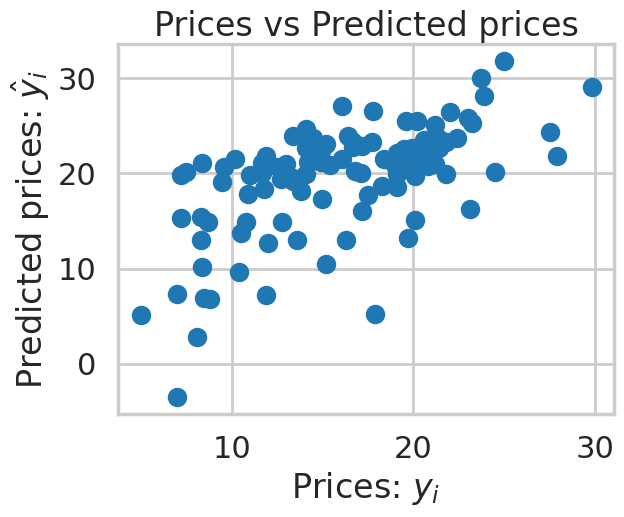

In [40]:
plt.scatter(y_validation, y_hat_validation.flatten())
plt.xlabel("Prices: $y_i$")
plt.ylabel("Predicted prices: $\hat{y}_i$")
plt.title("Prices vs Predicted prices")
